# Aula 02 - Quarentena Dados 🎲

## Temas tratados durante a aula:

- Realizando os Desafios
- Boas práticas com visualização de Dados
- O que é esse tal de Boxplot?

---
Relembrando os dados configurados da [Aula 01](https://github.com/littlebru/Quarentena-Dados/blob/master/Aula%2001%20-%20Python%2C%20Pandas%20e%20Colab.ipynb)

In [1]:
import pandas as pd

In [2]:
# Filmes é um dataframe
filmes = pd.read_csv('https://gist.githubusercontent.com/littlebru/fe6f50293b186a804acb4c0bab0ed9f6/raw/df1a86e0a4c23fd91c811e7c822b0b53ae3b5972/movies.csv')

# Traduzindo as colunas para o Portugues
filmes.columns = ['filmeId', 'titulo', 'genero']

# Mostrando os primeiros 5 valores da tabela
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


---
## Separando os generos para uma melhor visualização
Podemos visualizar que nesta tabela existem *id dos filmes*, *títulos* e uma coluna com os *gêneros* de cada filme.

Porém as categorias de gênero estão agrupadas em uma unica coluna e são separados por um *pipe* `` | `` ou barra vertical. 

Se eu quisesse procurar pela quantidade de gêneros existentes dentro da tabela, eu teria que separar cada um dos gêneros antes de realizar uma contagem.

Com a biblioteca do *``pandas``* é possivel separar os gêneros e verificar quais deles existem dentro da coluna ``genero`` na linha de cada filme.

(Tudo isso em uma unica linha 😏)

### Desafio do Professor [Allan Spadini](https://twitter.com/allanspadini)
Descobrir os generos dos filmes (quais são eles, únicos).


In [3]:
# Pegando os valores da coluna 'genero'
# Definindo que o separador doe elementos é o pipe '|'
# Imprimindo apenas os 15 primeiros (para demonstração)

filmes['genero'].str.get_dummies('|').head(15)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


---
Como você percebeu, a saída é um [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), cada linha do DataFrame corresponde a respectiva linha da coluna de gênero da tabela de filmes, cada coluna corresponde a um gênero.

``👀 Repare que cada gênero único virou uma coluna no DataFrame``

---
### Como estes valores 0/1 estão sendo preenchidos na tabela?
Para explicar vou dar um exemplo:

Vamos pegar os gêneros do filme **Toy Story** ``Adventure|Animation|Children|Comedy|Fantasy``

Na coluna dos respectivos gêneros (dentro do DataFrame) o valor será 1, para todos os outros gêneros que não são generos de Toy Story, o valor será 0.
#### Resumindo:
``Se o nome da coluna pertence a algum gênero de determinado filme, o valor será 1 , caso contrário será 0.``

---

## Quantas vezes cada gênero aparece na tabela e filmes?
Conseguimos separar os gêneros para uma melhor visualização dos dados.

Agora, podemos contar quantas vezes eles aparecem dentro da tabela de filmes.

###  Desafio da Professora [Thais André](https://twitter.com/thais_tandre)
Contar o número de aparições de cada genero.

In [4]:
# Realizando uma soma, que conta quantos 1 tem em cada coluna do DataFrame

filmes['genero'].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

## Melhorando a visualização dos dados da tabela
Vamos ordenar a tabela acima para ficar mais facil de responder perguntas como 'Qual é o gênero com mais filmes produzidos', 'Qual o Segundo?'

Precisamos ter uma melhor visualização dos dados e podemos ordena-los com o método ``.sort_values()``

In [5]:
# Ordenando a tabela gerada em ordem Decrescente

filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

---
## Melhorando a visualização das informações com GRÁFICOS!!

Podemos deixar a leitura dos dados ainda melhor, com uma imagem, ou melhor... com um gráfico 😏.

### Desafio do Instrutor [Guilherme Silveira](https://twitter.com/guilhermecaelum)
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

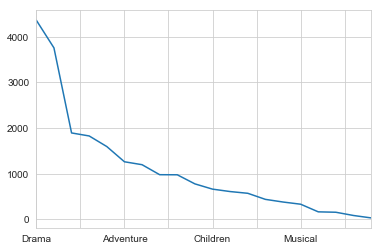

In [31]:
# Plotando um gráfico de linha (Poxa, ficou confuso né?)

filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False).plot()

Acima temos um gráfico de linhas que é geado por padrão pelo comando ``.plot()`` do pandas, quando não se passa parâmetro algum.

Este tipo de gráfico não é recomendável para os tipos de dados que estamos trabalhando.

Isso nos ensina que, não adianta só plotar uma imagem, é preciso definir os tipos do gráfico que você quer gerar para ser condinzente com os tipos de dados que você esta tratando.

---
## Gerando o famoso gráfico de Pizza/Torta
Ja que o gráfico de linhas não nos ajudou na interpretação dos dados, podemos tentar com um outro tipo de gráfico, um bem conhecido, o gráfico de Pizza.

Será que vai melhorar?😐



In [7]:
import matplotlib.pyplot as plt

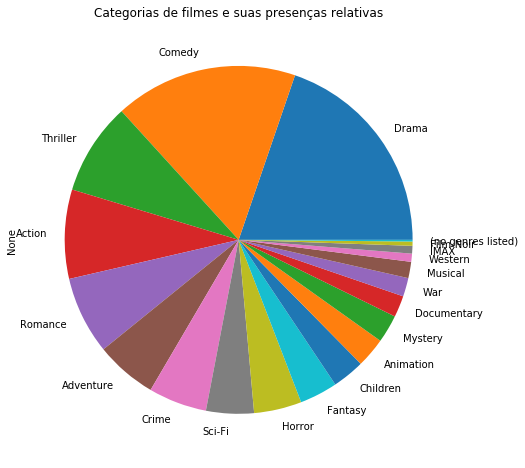

In [8]:
# Plotando um gráfico de Pizza/Torta

filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Categorias de filmes e suas presenças relativas',
    figsize=(8,8))
plt.show()

## Eai?😐
Ainda não esta facil fazer a leitura dos dados, não é mesmo? 

Quais foram os problemas deste gráfico?
- As cores começam a se repetir, dando a impressão de que um dado tem alguma relação com outro
- Os generos com menos filmes estão ilegíveis
- Você consegue me dizer se Thriller é maior do que Action? 

O gráfico de Pizza não torna as comparações claras e não deixa claro ou "Transparente" a quantidade dos dados de cada gênero da tabela

Vamos utilizar um modelo mais adequado!

---

# Utilizando barras!
Vamos então migrar de Pizza para Barra, alterando apenas o paramêtro ``kind`` do método ```.plot()``.

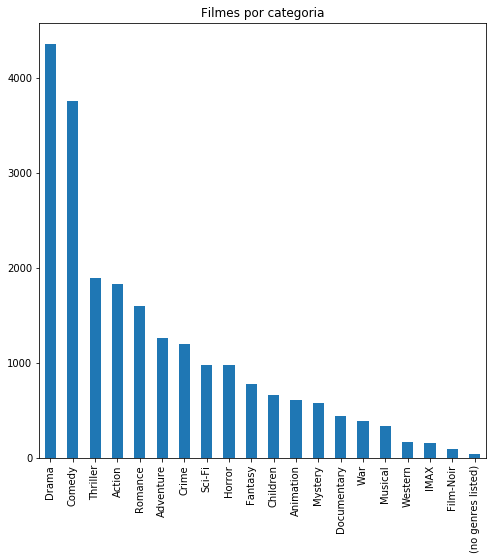

In [9]:
# Plotando um gráfico de Barras

filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

---
O gráfico de Barra torna a análise bem mais simples, no gráfico de pizza era super difícil comparar ``Thriller`` e ``Action``, agora a comparação ficou fácil e conseguimos perceber o quão perto estão uma da outra

A interpretação dos dados melhorou muito com essa visualização, mas podemos melhorar ainda mais. 

O que queremos é tornar evidênte os gêneros que tem a maior participação nos filmes em geral, ou seja transparecer através da imagem uma visão geral de proporcionalidade.

Para tornar evidênte essa informação vamos utilizar algo "semelhante" a um [mapa de calor](https://en.wikipedia.org/wiki/Heat_map).

----

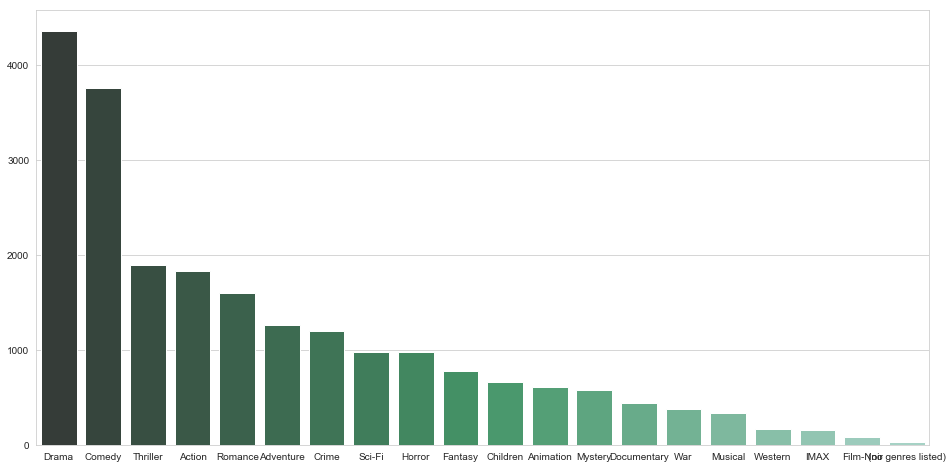

In [10]:
# Plotando o gráfico de barras com intensificação de cor
# Utilizando uma paleta de cores com degradê de verde

import seaborn as sns

# Desenhando grades de referencia ao eixo X
sns.set_style("whitegrid")

# Ordenando a tabela gerada em ordem Decrescente
filmes_por_genero = filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)

# Alterando a dimensão da imagem
plt.figure(figsize=(16,8))

# Gerando gráfico com seaborn
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_d", n_colors=len(filmes_por_genero)))
plt.show()

## vamos descrever este código 😏
* Primeiro, não plotamos mais a imagem com o ``.plot()`` do ``pandas``, vamos precisar de uma biblioteca de visualização mais poderosa para configurar nossa imagem, utilizamos o ``seaborn``.


* Segundo, chamamos o ``barplot`` do ``seaborn``,adicionando uma paleta de cores, como um mapa de calor (com o parâmetro ``pallete``) no parâmetro ``n_color`` de ``sns.color_pallete()``.


* Terceiro, adicionamos o ``sns.set_style("whitegrid")`` para que todos os gráficos tenham a **linha de grade do eixo X** evidênte, facilitando a comparação entre as barras.


* Quarto, dimensionamos a imagem com o ``figsize`` do método ``plt.figure()``, para que tenhamos um gráfico com muitas informações e agradável de analisar

---
## Visualização dos xticks (Legenda das barrinhas)
Podemos melhorar ainda mais a visualização das legendas das barrinhas (chamados **xtickslabels**), rotacionando em um angulo mais agradável para leitura dos nomes.

### Desafio do Instrutor [Guilherme Silveira](https://twitter.com/guilhermecaelum)
Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

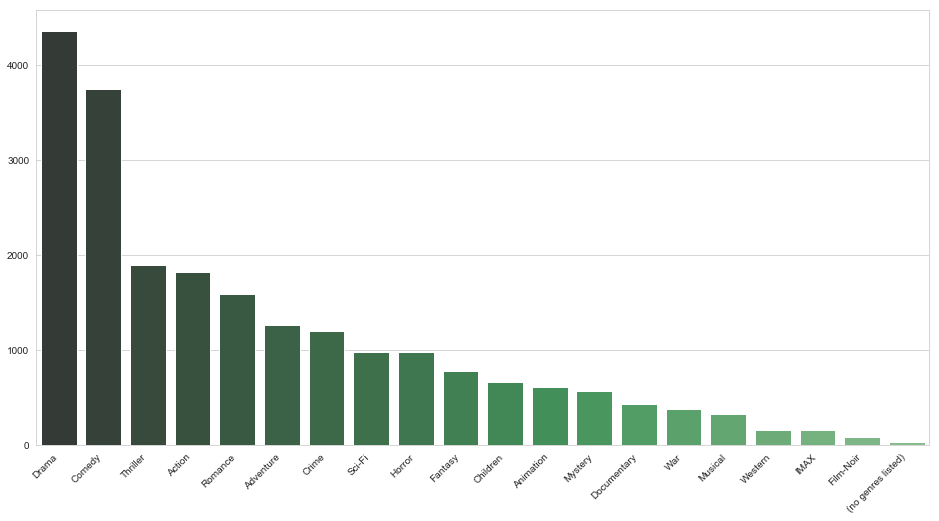

In [11]:
import seaborn as sns

# Este padrão é global, adiciona linhas de grade
sns.set_style("whitegrid")

# Capturando dados crus da tabela
filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)

# Alterando a dimensaão da imagem
plt.figure(figsize=(16,8))

# Gerando gráfico com seaborn
grafico_generos = sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette = sns.color_palette("Greens_d", n_colors=len(filmes_por_genero) + 4))

# Rotacionando a legenda das barras (xticks) para uma melhor visualização
grafico_generos.set_xticklabels(grafico_generos.get_xticklabels(),
                                rotation=45,
                                horizontalalignment='right')

plt.show()

---
## Retomando dados da [Aula 01](https://github.com/littlebru/Quarentena-Dados/blob/master/Aula%2001%20-%20Python%2C%20Pandas%20e%20Colab.ipynb)
Vamos aqui continuar utilizando as bases de dados que manuseamos na aula 01 e agora gerar gráficos e muitas outras coisas com as informações.

In [12]:
# Importando tabela de dados de avaliações
avaliacoes = pd.read_csv('https://gist.githubusercontent.com/littlebru/b355db5f15177cab8d9207ed586600f2/raw/a3262f5c8d06a29323582acb2605798479a03aa7/ratings.csv')

# Alterando o nome das colunas
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
# Agrupando os valores da tabela e mostrando a média das notas por filme

notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.883838
2    3.369048
3    3.520000
4    2.600000
5    3.565217
Name: nota, dtype: float64

---
## Visualização das Avaliações dos Filmes

Será que conseguimos utilizar visualizações para entender melhor as notas de um filme?

Na [aula 01](https://github.com/littlebru/Quarentena-Dados/blob/master/Aula%2001%20-%20Python%2C%20Pandas%20e%20Colab.ipynb) calculamos as notas médias por filmes, vamos dar uma olhada no resultado.

In [14]:
# Unindo os dados das duas tabelas
# Se os dados se não estiverem com a mesma quantidade de informações
# ordenar apenas pelos dados que ja foram avaliados

filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.883838
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.369048
2,3,Grumpier Old Men (1995),Comedy|Romance,3.520000
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.600000
4,5,Father of the Bride Part II (1995),Comedy,3.565217


👀 Olhar apenas as médias pode ser um problema e para interpretar um pouco melhor os dados usamos o histograma das notas para comparar alguns filmes. 

Por exemplo, **Toy Story** e **Jumanji**

Média de notas: 3.8838383838383836


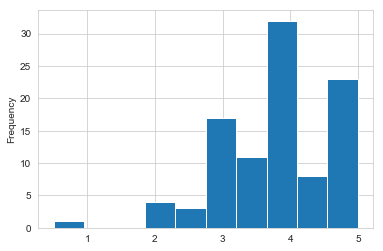

In [15]:
notas_do_filme_1 = avaliacoes.query("filmeId==1")["nota"]

# Imprimindo a média de notas do filme
print(f'Média de notas: {notas_do_filme_1.mean()}')

# Plotando gráfico com as notas do filme Toy Story
notas_do_filme_1.plot(kind='hist')

Média de notas: 3.369047619047619


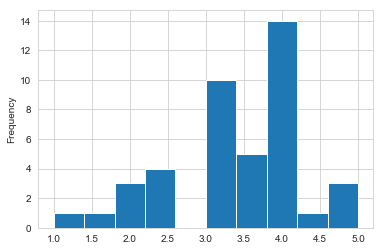

In [16]:
notas_do_filme_2 = avaliacoes.query("filmeId==2")["nota"]

# Imprimindo a média de notas do filme
print(f'Média de notas: {notas_do_filme_2.mean()}')

# Plotando gráfico com as notas do filme Jumaiji
notas_do_filme_2.plot(kind='hist')

### Comportamentos diferentes
##### ``Médias relativamente próximas mas comportamentos diferentes``
ToyStory e Jumanji tem médias relativamente próximas mas tem um comportamento de notas diferentes, então, para nosso exemplo, as médias ajudam bastante mas esconde informações importantes sobre os dados.

---
Vamos buscar dois filmes com médias muito mais próximas que Toy Story e Jumanji, para analisar outras métricas além das médias.

In [17]:
# Imprimindo filmes entre as posições 2490 e 2500
filmes_com_media.sort_values("nota", ascending=False)[2490:2500]

,filmeId,titulo,genero,nota
4181,6025,CB4 - The Movie (1993),Comedy,3.75
8359,108949,"Art of the Steal, The (2013)",Crime,3.75
7765,91485,"Expendables 2, The (2012)",Action|Adventure,3.75
8379,109578,Non-Stop (2014),Action|Mystery|Thriller,3.75
2946,3950,Tigerland (2000),Drama,3.75
4923,7380,Ella Enchanted (2004),Comedy|Fantasy|Romance,3.75
7734,90717,Tower Heist (2011),Action|Comedy|Crime,3.75
1751,2349,Mona Lisa (1986),Comedy|Thriller,3.75
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.75
8744,127198,Dope (2015),Comedy|Drama,3.75


Podemos visualizar que a média desses filmes são extremamente próximas, porém podem conter poucas quantidade de votos, vamos plotar alguns gráficos para decobrir o que acontece por trás com esse dados.

Dessa vez vamos criar uma função ``plot_filme`` que realize esta tarefa, para que não precisemos ficar realizando tarefas repetitivas e dando Copy/Paste nos códigos anteriores.

In [18]:
# Função gera gráfico dos filmes com demonstração das notas
# e imprime a descrição do filme, como (nota média, nota maxima, etc)

def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

#### Comparando outros filmes
Vamos comparar os filmes ``Mona Lisa (1986)`` **filmeID= 2349** e ``Dope (2015)`` **filmeId=127198**

count    4.000000
mean     3.750000
std      1.258306
min      2.000000
25%      3.500000
50%      4.000000
75%      4.250000
max      5.000000
Name: nota, dtype: float64

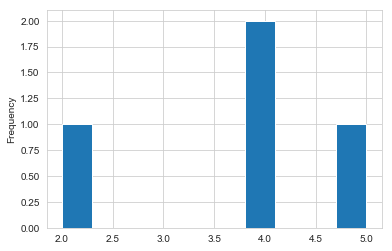

In [19]:
# Pegando o filme 'Mona Lisa (1986)' a posicao 2349 e indice 1751
plot_filme(2349)

count    2.000000
mean     3.750000
std      0.353553
min      3.500000
25%      3.625000
50%      3.750000
75%      3.875000
max      4.000000
Name: nota, dtype: float64

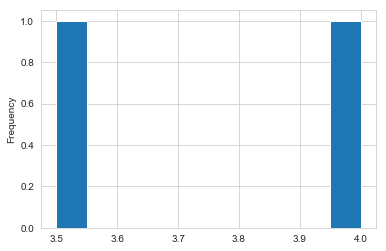

In [20]:
# Pegando o filme 'Dope (2015)' a posicao 127198 e indice 8744
plot_filme(127198)

---
Com estas informações podemos comparar melhor ambos os filmes.

Analisando os histogramas, vemos que no flime ``Mona Lisa`` as notas são bem variadas (2, 4, 5), no flime ``Dope`` as notas são mais altas indo de (3.5, 4), porém podemos supor que nos dois filmes houve uma quantidade bem pequena de votos, por isso a grande diferença das notas.

O que confirma nossa análise é compara os valores de **25% 50% 75%**.

**50%** é o valor da mediana, e ambos os flimes tem a mesma mediana, mas **25%** e **75%** são diferentes.

Esses sistemas de medida são os [quartis](https://pt.wikipedia.org/wiki/Quartil)

---
## Utilizando o [Boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)
Agora vamos adaptar nossa função criada anteriormente para conseguir plotar o boxplot e interpreta-lo

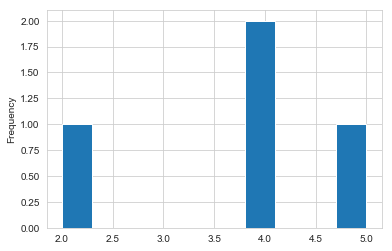

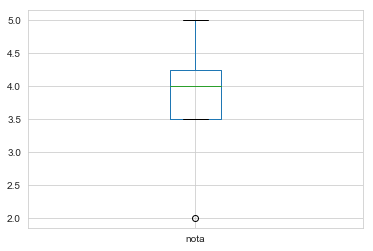

count    4.000000
mean     3.750000
std      1.258306
min      2.000000
25%      3.500000
50%      4.000000
75%      4.250000
max      5.000000
Name: nota, dtype: float64

In [22]:
# Plotando gráfico boxplot do filme Mona Lisa

def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

plot_filme(2349)

Simples não é mesmo?, nós apenas chamamos o método ``.plot.box()``, agora vamos interpretar o gráfico.

Neste caso temos uma informação a mais, no caso temos essa bolinha localizada em y=2. 

A "bolinha" chamamos de valor discrepante, por ir além dos limites inferior e superior (chamamos na aula de outliers, existem várias formas de calcular os outliers, mas no nosso caso esses são os outliers do boxplot).

#### Interpretando as informações do gráfico
Compare o desenho com as estatísticas geradas pelo ``.describe()``

**<p style="color: green">A linha verde</p>**(Que divide a caixa em dois) - Representa a mediana, o valor de **50%**

**A linha superior da caixa** - Representa o valor dos **75%**, é o 3º Quartil

**A linha inferior da caixa** - Representa o valor dos **25%**, é o 1º Quartil


---
Agora repare nos limites inferior e superior, represetados pelas extremidades em preto.

Por coincidência, nesta imagem os limites inferior e superior são equivalentes ao ponto de máximo e mínimo, mas nem sempre será assim, pois esse limite superir e inferior são calculados e dependem de Q1 e Q3. 

Algumas vezes os limites podem sobrepor os extremos das "caixas" e isso geralmente ocorre quando temos uma quantidade pequena de dados.

Como tivemos sobreposição do limite superior vamos calcular o boxplot de outro filme, para analisar o resultado.

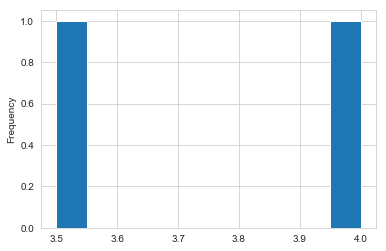

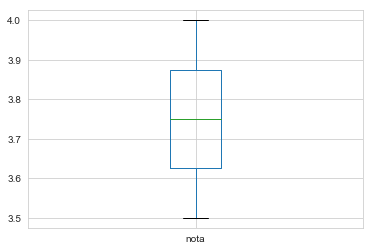

count    2.000000
mean     3.750000
std      0.353553
min      3.500000
25%      3.625000
50%      3.750000
75%      3.875000
max      4.000000
Name: nota, dtype: float64

In [25]:
# Plotando gráfico com informações do filme TigerLand

plot_filme(127198)

Olha que legal, diferente do primeiro boxplot, neste os limites superiores não se sobrepõe.

---
## Plotando as informações dos filmes juntas

Estamos comparando os boxplot dos filmes, mas eles estão em imagens separadas, vamos juntas vários boxplot em uma imagem só. Veja como podemos fazer isso usando o seaborn, para aprendermos outra forma de plotar boxplot!

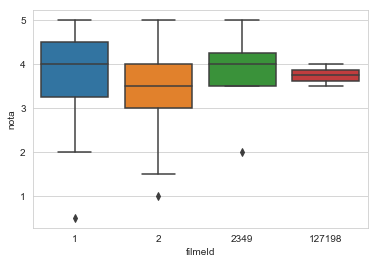

In [30]:
# Plotando informações dos filmes (Mona lisa, TigerLand, Toy Story e Jumanji)
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,2349,127198]"), x ="filmeId", y="nota")

Chamamos o ``sns.boxplot()`` passando três parâmetros. 

Parâmetro dados é um dataframe das notas dos filmes com Toy Story, Jumanji, Mona Lisa e TigerLand (usamos o .query() para selecionar os dados), x é o Id do filme e y as respectivas notas. 